### Real World Example #1: Restaurant Violation Data
In this example, we will show how regexes can allow us to track quantitative data across categories defined by the appearance of various text fields.

In this example we'll see how the presence of certain keywords can affect quantitative data, e.g. how do restaurant health scores vary as a function of the number of violations that mention "vermin"?

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile
%matplotlib inline

In [16]:
vio = pd.read_csv('violations.csv', header=0, names=['id', 'date', 'desc'])
desc = vio['desc']
vio.head()

,id,date,desc
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


In [17]:
counts = desc.value_counts()
counts[:10]

Unclean or degraded floors walls or ceilings                          999
Unapproved or unmaintained equipment or utensils                      659
Inadequately cleaned or sanitized food contact surfaces               493
Improper food storage                                                 476
Inadequate and inaccessible handwashing facilities                    467
Moderate risk food holding temperature                                452
Wiping cloths not clean or properly stored or inadequate sanitizer    418
Moderate risk vermin infestation                                      374
Unclean nonfood contact surfaces                                      369
Food safety certificate or food handler card not available            353
Name: desc, dtype: int64

In [18]:
##Some more description
counts[50:60]


Unclean or degraded floors walls or ceilings  [ date violation corrected: 11/29/2017 ]              16
Moderate risk food holding temperature   [ date violation corrected: 10/11/2016 ]                   16
Unclean or degraded floors walls or ceilings  [ date violation corrected: 9/19/2017 ]               16
Unclean or degraded floors walls or ceilings  [ date violation corrected: 12/7/2017 ]               15
Unclean or degraded floors walls or ceilings  [ date violation corrected: 11/27/2017 ]              15
Inadequately cleaned or sanitized food contact surfaces  [ date violation corrected: 9/26/2017 ]    14
Unclean or degraded floors walls or ceilings  [ date violation corrected: 9/6/2017 ]                14
Unapproved or unmaintained equipment or utensils  [ date violation corrected: 9/19/2017 ]           14
Unclean or degraded floors walls or ceilings  [ date violation corrected: 11/28/2017 ]              14
Unsanitary employee garments hair or nails                               

In [19]:
#Use regular expressions to cut out the extra info in square braces.
vio['clean_desc'] = (vio['desc']
             .str.replace('\s*\[.*\]$', '')
              .str.strip()
              .str.lower())


In [20]:
#Look at "Clean_desc"
vio['clean_desc'].value_counts().head()

unclean or degraded floors walls or ceilings               3507
moderate risk food holding temperature                     2542
inadequate and inaccessible handwashing facilities         2529
unapproved or unmaintained equipment or utensils           2382
inadequately cleaned or sanitized food contact surfaces    2301
Name: clean_desc, dtype: int64

In [21]:
#use regular expressions to assign new features for the presence of various keywords
with_features = (vio
 .assign(is_clean     = vio['clean_desc'].str.contains('clean|sanit'))
 .assign(is_high_risk = vio['clean_desc'].str.contains('high risk'))
 .assign(is_vermin    = vio['clean_desc'].str.contains('vermin'))
 .assign(is_surface   = vio['clean_desc'].str.contains('wall|ceiling|floor|surface'))
 .assign(is_human     = vio['clean_desc'].str.contains('hand|glove|hair|nail'))
 .assign(is_permit    = vio['clean_desc'].str.contains('permit|certif'))
)
with_features.head()

,id,date,desc,clean_desc,is_clean,is_high_risk,is_vermin,is_surface,is_human,is_permit
0,19,20171211,Inadequate food safety knowledge or lack of ce...,inadequate food safety knowledge or lack of ce...,False,False,False,False,False,True
1,19,20171211,Unapproved or unmaintained equipment or utensils,unapproved or unmaintained equipment or utensils,False,False,False,False,False,False
2,19,20160513,Unapproved or unmaintained equipment or utensi...,unapproved or unmaintained equipment or utensils,False,False,False,False,False,False
3,19,20160513,Unclean or degraded floors walls or ceilings ...,unclean or degraded floors walls or ceilings,True,False,False,True,False,False
4,19,20160513,Food safety certificate or food handler card n...,food safety certificate or food handler card n...,False,False,False,False,True,True


In [23]:
##Group it by id and date

count_features = with_features.groupby(['id','date']).sum().reset_index()
count_features.iloc[:10, :]

,id,date,is_clean,is_high_risk,is_vermin,is_surface,is_human,is_permit
0,19,20160513,1,0,0,1,1,1
1,19,20171211,0,0,0,0,0,1
2,24,20160311,2,0,0,2,0,0
3,24,20161005,1,0,0,1,0,0
4,24,20171101,0,0,0,0,0,0
5,31,20151204,0,0,0,0,1,1
6,45,20160104,3,0,0,3,1,1
7,45,20160614,1,0,1,1,0,1
8,45,20170307,3,0,1,2,1,1
9,45,20170914,2,1,1,2,0,0


In [24]:
count_features.query('is_vermin > 1')

,id,date,is_clean,is_high_risk,is_vermin,is_surface,is_human,is_permit
255,489,20150728,5,0,2,3,0,0
291,527,20170821,1,1,2,1,1,1
1508,2622,20160526,4,2,2,3,0,0
1573,2721,20150422,2,1,2,1,0,0
1746,2945,20150921,2,1,2,2,2,1
2277,3776,20151223,2,0,2,1,0,0
3784,6729,20160706,6,0,2,4,2,0
3949,7537,20150304,1,0,2,1,1,0
4017,7661,20160616,2,0,2,2,1,0
4165,9679,20150422,2,0,2,2,0,0


In [25]:
#use a new pandas feature called "melt" 
#the resulting frame is a violation type in a given inspection
#like a reverse operation of pivot_table
broken_down_by_violation_type = pd.melt(count_features, id_vars=['id', 'date'],
            var_name='feature', value_name='num_vios')
broken_down_by_violation_type.sort_values(["id", "date"]).head(13)

,id,date,feature,num_vios
0,19,20160513,is_clean,1
12262,19,20160513,is_high_risk,0
24524,19,20160513,is_vermin,0
36786,19,20160513,is_surface,1
49048,19,20160513,is_human,1
61310,19,20160513,is_permit,1
1,19,20171211,is_clean,0
12263,19,20171211,is_high_risk,0
24525,19,20171211,is_vermin,0
36787,19,20171211,is_surface,0


In [26]:
#read in the scores
ins = pd.read_csv('inspections.csv',
                  header=0,
                  usecols=[0, 1, 2],
                  names=['id', 'score', 'date'])
ins.head()

,id,score,date
0,19,94,20160513
1,19,94,20171211
2,24,98,20171101
3,24,98,20161005
4,24,96,20160311


In [27]:
#join scores with the table broken down by violation type
violation_type_and_score = broken_down_by_violation_type.merge(ins,left_on=['id','date'],right_on=['id','date'])
violation_type_and_score.head(10)

,id,date,feature,num_vios,score
0,19,20160513,is_clean,1,94
1,19,20160513,is_high_risk,0,94
2,19,20160513,is_vermin,0,94
3,19,20160513,is_surface,1,94
4,19,20160513,is_human,1,94
5,19,20160513,is_permit,1,94
6,19,20171211,is_clean,0,94
7,19,20171211,is_high_risk,0,94
8,19,20171211,is_vermin,0,94
9,19,20171211,is_surface,0,94


In [14]:
#Make a catagorical plots to Show score as a function of features

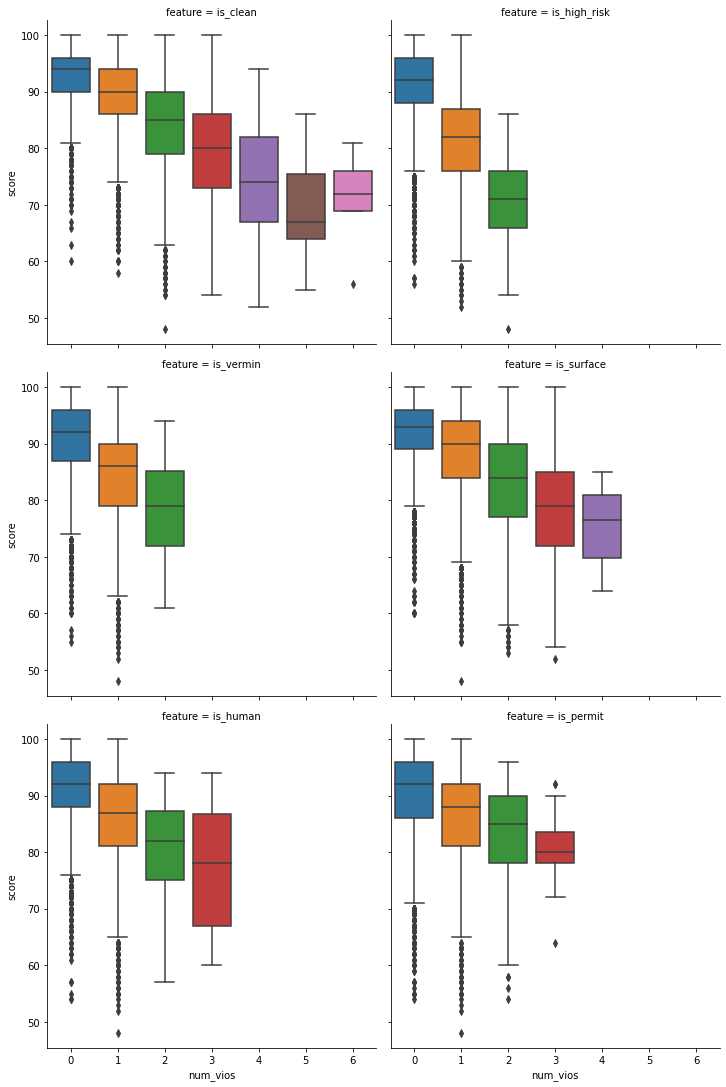

In [29]:
sns.catplot(x='num_vios',y='score',col='feature',col_wrap=2,kind='box',data=violation_type_and_score)